<a href="https://colab.research.google.com/github/jansiddiqui/Learning-MachineLearning/blob/main/Crime_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
df = pd.read_csv("/content/final_cleaned_filtered_female_crime.csv")
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Latitude,Longitude,hour_of_day,is_night,severity_score,safety_label
0,3,2020-02-01 05:00:00,2020-01-01 02:00:00,01-01-2020 14:30,Ludhiana,271,Kidnapping,48,F,Blunt Object,Other Crime,15.0,No,NaN,30.909016,75.851601,14.0,0.0,5.0,Unsafe
1,4,2020-01-01 05:00:00,2020-01-01 03:00:00,01-01-2020 14:46,Pune,170,Burglary,49,F,Firearm,Other Crime,1.0,Yes,29-04-2020 05:00,18.521374,73.854507,14.0,0.0,2.0,Safe
2,5,2020-01-01 21:00:00,2020-01-01 04:00:00,01-01-2020 16:51,Pune,421,Vandalism,30,F,Other,Other Crime,18.0,Yes,08-01-2020 21:00,18.521374,73.854507,16.0,0.0,2.0,Safe
3,7,2020-01-01 16:00:00,2020-01-01 06:00:00,01-01-2020 14:08,Chennai,172,Vehicle - Stolen,64,F,Knife,Violent Crime,13.0,Yes,24-03-2020 16:00,13.083694,80.270186,14.0,0.0,2.0,Safe
4,13,2020-01-01 16:00:00,2020-01-01 12:00:00,01-01-2020 23:14,Visakhapatnam,498,Fraud,36,F,Poison,Other Crime,3.0,Yes,29-02-2020 16:00,17.693553,83.292130,23.0,1.0,2.0,Unsafe


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19238 entries, 0 to 19237
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Report Number       19238 non-null  int64  
 1   Date Reported       19238 non-null  object 
 2   Date of Occurrence  19238 non-null  object 
 3   Time of Occurrence  19238 non-null  object 
 4   City                19238 non-null  object 
 5   Crime Code          19238 non-null  int64  
 6   Crime Description   19238 non-null  object 
 7   Victim Age          19238 non-null  int64  
 8   Victim Gender       19238 non-null  object 
 9   Weapon Used         19238 non-null  object 
 10  Crime Domain        19237 non-null  object 
 11  Police Deployed     19237 non-null  float64
 12  Case Closed         19237 non-null  object 
 13  Date Case Closed    9626 non-null   object 
 14  Latitude            19237 non-null  float64
 15  Longitude           19237 non-null  float64
 16  hour

In [22]:
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed,Latitude,Longitude,hour_of_day,is_night,severity_score
count,19238.000000,19238.000000,19238.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000
mean,16563.123973,349.074124,44.375611,10.030566,21.755968,77.459962,11.421064,0.415397,2.237407
std,10837.287894,144.504923,20.090689,5.462932,5.430326,4.109619,6.896667,0.492803,0.910840
min,3.000000,100.000000,10.000000,1.000000,12.976794,70.802838,0.000000,0.000000,1.000000
25%,7277.250000,225.000000,27.000000,5.000000,18.521374,73.854507,5.000000,0.000000,2.000000
50%,14506.000000,348.000000,44.000000,10.000000,21.209489,77.219771,11.000000,0.000000,2.000000
75%,27000.500000,474.000000,62.000000,15.000000,26.915458,79.082056,17.000000,1.000000,2.000000
max,35448.000000,599.000000,79.000000,19.000000,34.074744,88.363895,23.000000,1.000000,5.000000


In [23]:
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,0
Victim Age,0
Victim Gender,0
Weapon Used,0


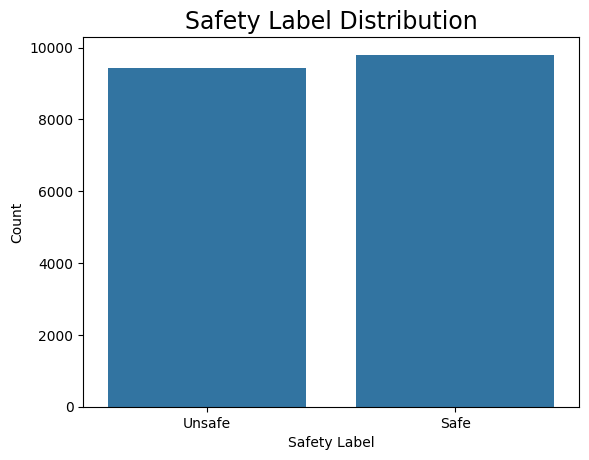

safety_label
Safe      9799
Unsafe    9438
Name: count, dtype: int64


In [24]:
sns.countplot(x="safety_label", data=df)
plt.title("Safety Label Distribution", fontsize=17)
plt.xlabel("Safety Label")
plt.ylabel("Count")
plt.show()

print(df["safety_label"].value_counts())

In [25]:
df = df.drop([
    "Report Number",
    "Date Reported",
    "Date of Occurrence",
    "Time of Occurrence",
    "Date Case Closed"
], axis=1)


In [26]:
Encoder = LabelEncoder()
df["safety_label"] = Encoder.fit_transform(df["safety_label"])

df["safety_label"].head()


,safety_label
0,1
1,0
2,0
3,0
4,1


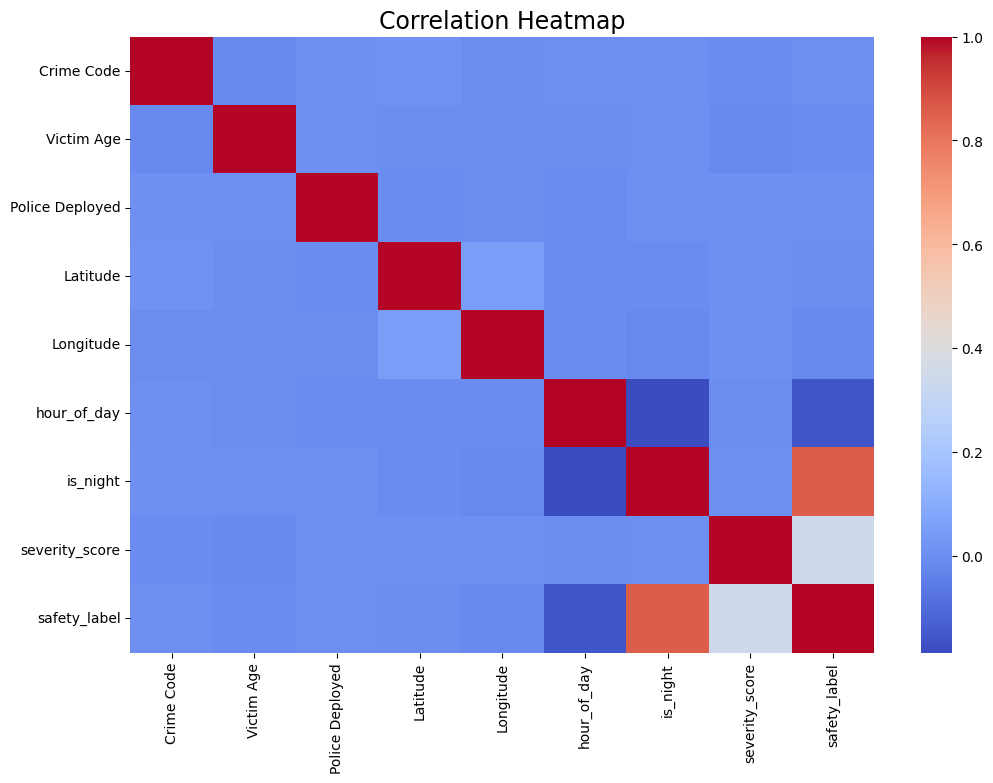

In [27]:
plt.figure(figsize=(12,8))
c = df.corr(numeric_only=True)
sns.heatmap(c, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=17)
plt.show()

In [28]:
# Encoded all categorical columns in df
from sklearn.preprocessing import LabelEncoder

label_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


x = df.drop([
    "safety_label",
    "severity_score",
    "is_night"
], axis=1)

y = df["safety_label"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [29]:

from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),   # fills missing values
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000, random_state=42))
])


pipeline.fit(x_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [30]:
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

y_pred_prob = pipeline.predict_proba(x_test)[:, 1]

results_df = pd.DataFrame({
    "Actual Label": y_test,
    "Predicted Label": y_pred_test,
    "Predicted Probability": y_pred_prob
})

results_df.head()


,Actual Label,Predicted Label,Predicted Probability
736,1,1,0.687544
8674,0,0,0.349665
5971,0,0,0.373756
1957,1,0,0.322401
11076,0,0,0.449389


In [31]:
training_accuracy = accuracy_score(y_train, y_pred_train)
testing_accuracy = accuracy_score(y_test, y_pred_test)

print("Logistic Regression Results")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Logistic Regression Results
Training Accuracy: 0.6368421052631579
Testing Accuracy: 0.6437110187110187
